In [1]:
using ImmersedLayers

In [2]:
using CartesianGrids
using RigidBodyTools
using Plots
using UnPack
using LinearAlgebra

In [3]:
Δx = 0.04
Lx = 4.0
xlim = (-Lx/2,Lx/2)
ylim = (-Lx/2,Lx/2)
g = PhysicalGrid(xlim,ylim,Δx);

In [4]:
RadC = Lx/4
Δs = 1.4*cellsize(g);
body = Circle(RadC,Δs);

angs(n) = range(0,2π,length=n+1)[1:n];

In [5]:
X = VectorData(collect(body))

w = Nodes(Dual,size(g))
ϕ = Nodes(Primal,size(g))
q = Edges(Primal,size(g))
f = ScalarData(X);

In [10]:
scache = SurfaceScalarCache(body,g);

In [11]:
A = CLinvCT(scache,scale=cellsize(g));

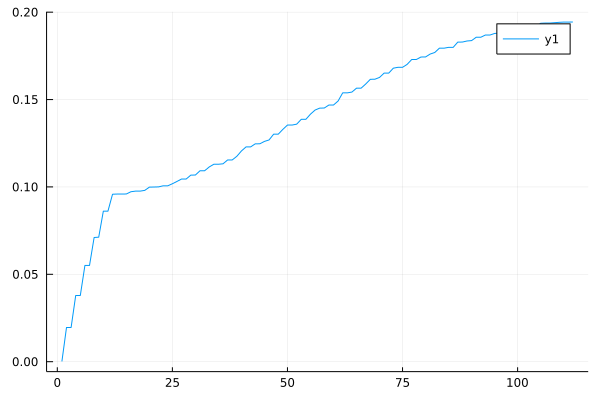

In [8]:
plot(eigvals(A))

In [14]:
f .= sin.(angs(length(body)) .- π/4)
  regularize_normal!(q,f,scache)
  normal_interpolate!(f,q,scache)
maximum(f)

11.257138642758864

In [15]:
using Test

In [16]:
@test maximum(f) ≈ 11 atol = 1e-0

Test Passed

In [18]:
A = CLinvCT(scache,scale=cellsize(g));

In [20]:
@test minimum(eigvals(A)) > 0

Test Passed

In [21]:
A = GLinvD(scache,scale=cellsize(g));

In [23]:
minimum(eigvals(A))

0.016817506725041256

In [29]:
A = nRTRn(scache);

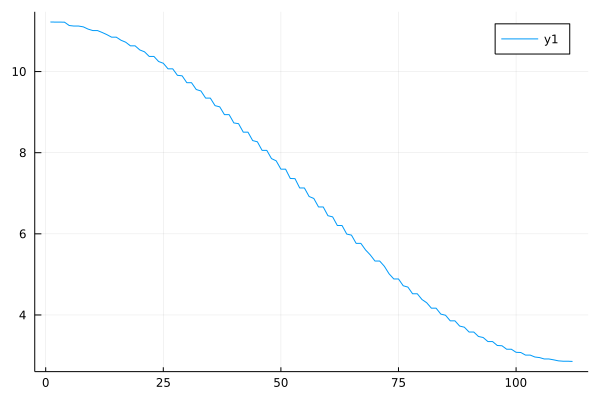

In [30]:
plot(svdvals(A))

In [31]:
@unpack L, regop = cache
Rn = RegularizationMatrix(regop,f,w);

f .= sin.(angs(length(body)) .- π/4);

surface_curl!(f,L\(Rn*f),scache);
surface_divergence!(ϕ,ScalarData(A\f),scache);
ϕ .= L\ϕ;

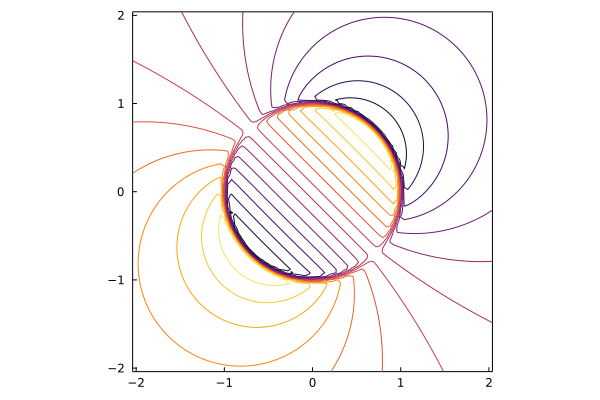

In [32]:
plot(ϕ,g)

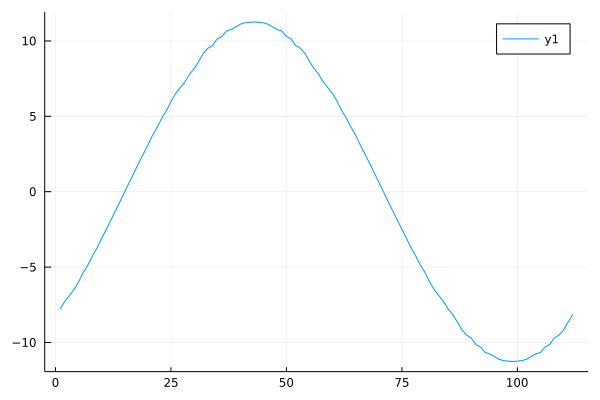

In [33]:
f .= sin.(angs(length(body)) .- π/4);

regularize_normal!(q,f,scache)
normal_interpolate!(f,q,scache)
plot(f)

In [42]:
F = svd(A);

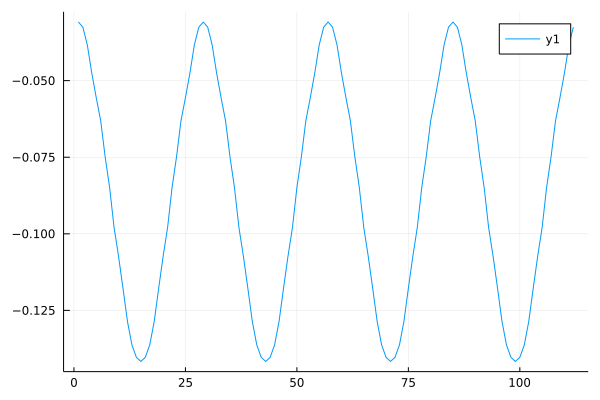

In [52]:
plot(F.V[:,1])

In [55]:
vcache = SurfaceVectorCache(body,g);

In [56]:
dq = EdgeGradient(Primal,size(g));
q = Edges(Primal,size(g));
vs = VectorData(X)
vs.u .= sin.(angs(length(body)) .- π/4);

In [57]:
regularize_normal!(dq,vs,vcache);

In [58]:
normal_interpolate!(vs,dq,vcache);

In [59]:
maximum(vs.u)

38.63806757026098

In [60]:
@test minimum(vs.u) ≈ -39 atol = 1e-0

Test Passed

In [97]:
surface_divergence!(q,vs,vcache);

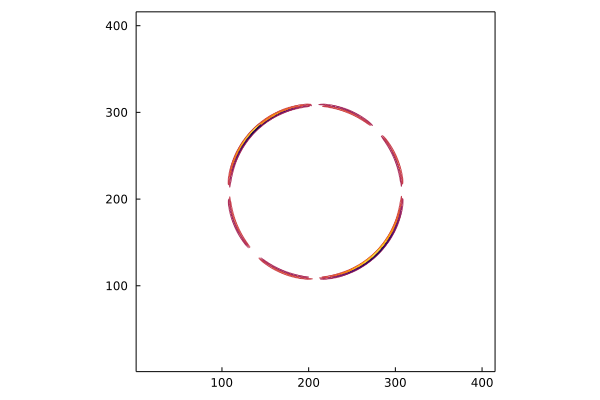

In [38]:
plot(q.v)

In [27]:
normal_interpolate!(vs,dq,vcache);

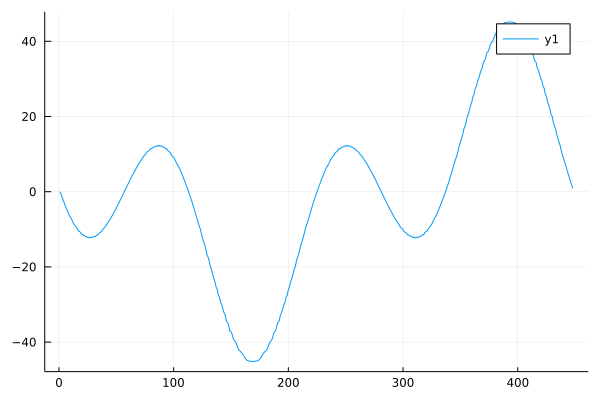

In [29]:
plot(vs.v)

In [61]:
surface_grad!(vs,q,vcache);

In [62]:
A = GLinvD(vcache,scale=cellsize(g));

In [64]:
maximum(eigvals(A))

1.7193488733346507

In [107]:
@test maximum(eigvals(A)) ≈ 1.8 atol = 1e-1


Test Passed

In [55]:
A = nRTRn(vcache);